In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to dynamically generate true probabilities for each segment and email category
def generate_segmented_category_means(segments, categories, low=0.05, high=0.1, seed=None):
    if seed:
        np.random.seed(seed)
    segmented_category_means = {}
    for segment in segments:
        segmented_category_means[segment] = {}
        for category in categories:
            segmented_category_means[segment][category] = np.random.uniform(low, high, size=7)
    return segmented_category_means

# Simulation function for Thompson Sampling with segmentation and categories
def thompson_sampling_simulation(num_customers, num_trials, means):
    days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    open_df = pd.DataFrame(columns=days)
    non_open_df = pd.DataFrame(columns=days)
    rewards = []
    
    for i in range(num_customers):
        N = len(means)  # Number of days
        S = np.zeros(N, dtype=int)  # Success counts
        F = np.zeros(N, dtype=int)  # Failure counts
        rnd = np.random.RandomState()  # Random state for reproducibility
        
        for trial in range(num_trials):
            prob = np.zeros(N)
            for j in range(N):
                prob[j] = rnd.beta(S[j] + 1, F[j] + 1)
            machine = np.argmax(prob)
            p = rnd.random_sample()
            if p < means[machine]:
                S[machine] += 1  # Success
                rewards.append(1)
            else:
                F[machine] += 1  # Failure
                rewards.append(0)

            
        open_df.loc[i] = S
        non_open_df.loc[i] = F

        
    success_rates = open_df.sum() / (open_df.sum() + non_open_df.sum())
    return success_rates, sum(rewards)  # Total rewards for the simulation

# Function to calculate regret and regret percentage
def calculate_regret(true_probabilities, total_rewards, num_trials):
    optimal_prob = max(true_probabilities)  # True probability of the best day
    optimal_reward = optimal_prob * num_trials*100  # Optimal reward across trials
    regret = optimal_reward - total_rewards  # Total regret
    regret_percentage = (regret / optimal_reward) * 100 if optimal_reward > 0 else 0
    return regret, regret_percentage

# Parameters
num_customers = 100
num_trials_values = [100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 25000, 50000]  # Dynamic trial counts
low_prob = 0.05
high_prob = 0.1
seed = 44

# Define Customer Segments and Email Categories
segments = ['Young Adults (18-25)', 'Working Professionals (26-45)', 'Seniors (45+)']
categories = ['Promotions', 'Discounts', 'Newsletters']
segmented_category_means = generate_segmented_category_means(segments, categories, low=low_prob, high=high_prob, seed=seed)

# Run simulations for each trial count
results = {}
metrics = {}  # Store regret and regret percentage
for num_trials in num_trials_values:
    print(f"Simulating for {num_trials} trials...")
    metrics[num_trials] = {}
    results[num_trials] = {}
    for segment, category_means in segmented_category_means.items():
        metrics[num_trials][segment] = {}
        results[num_trials][segment] = {}
        for category, means in category_means.items():
            # Run Thompson Sampling simulation
            success_rates, total_rewards = thompson_sampling_simulation(num_customers=num_customers, num_trials=num_trials, means=means)
            
            # Calculate regret and regret percentage
            regret, regret_percentage = calculate_regret(means, total_rewards, num_trials)
            results[num_trials][segment][category] = success_rates
            # Store metrics
            metrics[num_trials][segment][category] = {
                "Regret": regret,
                "Regret Percentage": regret_percentage,
                "Total Rewards": total_rewards
            }

Simulating for 100 trials...
Simulating for 250 trials...
Simulating for 500 trials...
Simulating for 750 trials...
Simulating for 1000 trials...
Simulating for 2500 trials...
Simulating for 5000 trials...
Simulating for 7500 trials...
Simulating for 10000 trials...
Simulating for 25000 trials...
Simulating for 50000 trials...


In [2]:
# Days of the week
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Prepare DataFrames for True Probabilities and Estimated Success Rates
true_probabilities_df = pd.DataFrame(columns=['Segment', 'Category'] + days)
estimated_success_rates_df = pd.DataFrame(columns=['Segment', 'Category'] + days)

# Populate the DataFrames
for segment, category_means in segmented_category_means.items():
    for category, means in category_means.items():
        # True Probabilities
        true_probabilities_df = true_probabilities_df._append({
            'Segment': segment,
            'Category': category,
            **dict(zip(days, means))
        }, ignore_index=True)
        
        # Estimated Success Rates
        success_rates = results[50000][segment][category]
        estimated_success_rates_df = estimated_success_rates_df._append({
            'Segment': segment,
            'Category': category,
            **dict(zip(days, success_rates))
        }, ignore_index=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22100\4179584210.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  true_probabilities_df = true_probabilities_df._append({
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22100\4179584210.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  estimated_success_rates_df = estimated_success_rates_df._append({


In [3]:
# Display the DataFrames
print("True Probabilities DataFrame:")
true_probabilities_df

True Probabilities DataFrame:


,Segment,Category,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,Young Adults (18-25),Promotions,0.091742,0.055240,0.087232,0.068025,0.067966,0.080462,0.069689
1,Young Adults (18-25),Discounts,0.070454,0.075495,0.085507,0.098026,0.072831,0.071383,0.055673
2,Young Adults (18-25),Newsletters,0.060895,0.097874,0.097168,0.094091,0.082321,0.060691,0.081842
3,Working Professionals (26-45),Promotions,0.056957,0.072935,0.093693,0.062923,0.083243,0.093134,0.057442
4,Working Professionals (26-45),Discounts,0.078147,0.057958,0.058645,0.055201,0.060147,0.072759,0.089729
5,Working Professionals (26-45),Newsletters,0.099541,0.090251,0.068871,0.075787,0.052945,0.085555,0.053625
6,Seniors (45+),Promotions,0.094131,0.086303,0.091668,0.085512,0.084871,0.096505,0.094084
7,Seniors (45+),Discounts,0.054749,0.072825,0.074636,0.055449,0.057687,0.099214,0.063578
8,Seniors (45+),Newsletters,0.094858,0.058212,0.056618,0.065868,0.065371,0.071103,0.066550


In [4]:
print("Estimated Success Rates DataFrame:")
estimated_success_rates_df

Estimated Success Rates DataFrame:


,Segment,Category,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,Young Adults (18-25),Promotions,0.091731,0.055663,0.087302,0.068679,0.068228,0.080942,0.069223
1,Young Adults (18-25),Discounts,0.069100,0.074843,0.084984,0.098059,0.072646,0.072055,0.055567
2,Young Adults (18-25),Newsletters,0.060624,0.097908,0.097150,0.093966,0.082315,0.062053,0.082465
3,Working Professionals (26-45),Promotions,0.056808,0.073180,0.093873,0.063552,0.082932,0.093237,0.056519
4,Working Professionals (26-45),Discounts,0.078587,0.059061,0.057893,0.054887,0.058799,0.072396,0.089579
5,Working Professionals (26-45),Newsletters,0.099448,0.090231,0.069886,0.076446,0.052628,0.085568,0.055341
6,Seniors (45+),Promotions,0.093687,0.086465,0.091943,0.085314,0.085332,0.096511,0.093630
7,Seniors (45+),Discounts,0.053861,0.074339,0.075301,0.054633,0.057858,0.099145,0.063893
8,Seniors (45+),Newsletters,0.095121,0.060270,0.055150,0.066139,0.065671,0.072700,0.067716


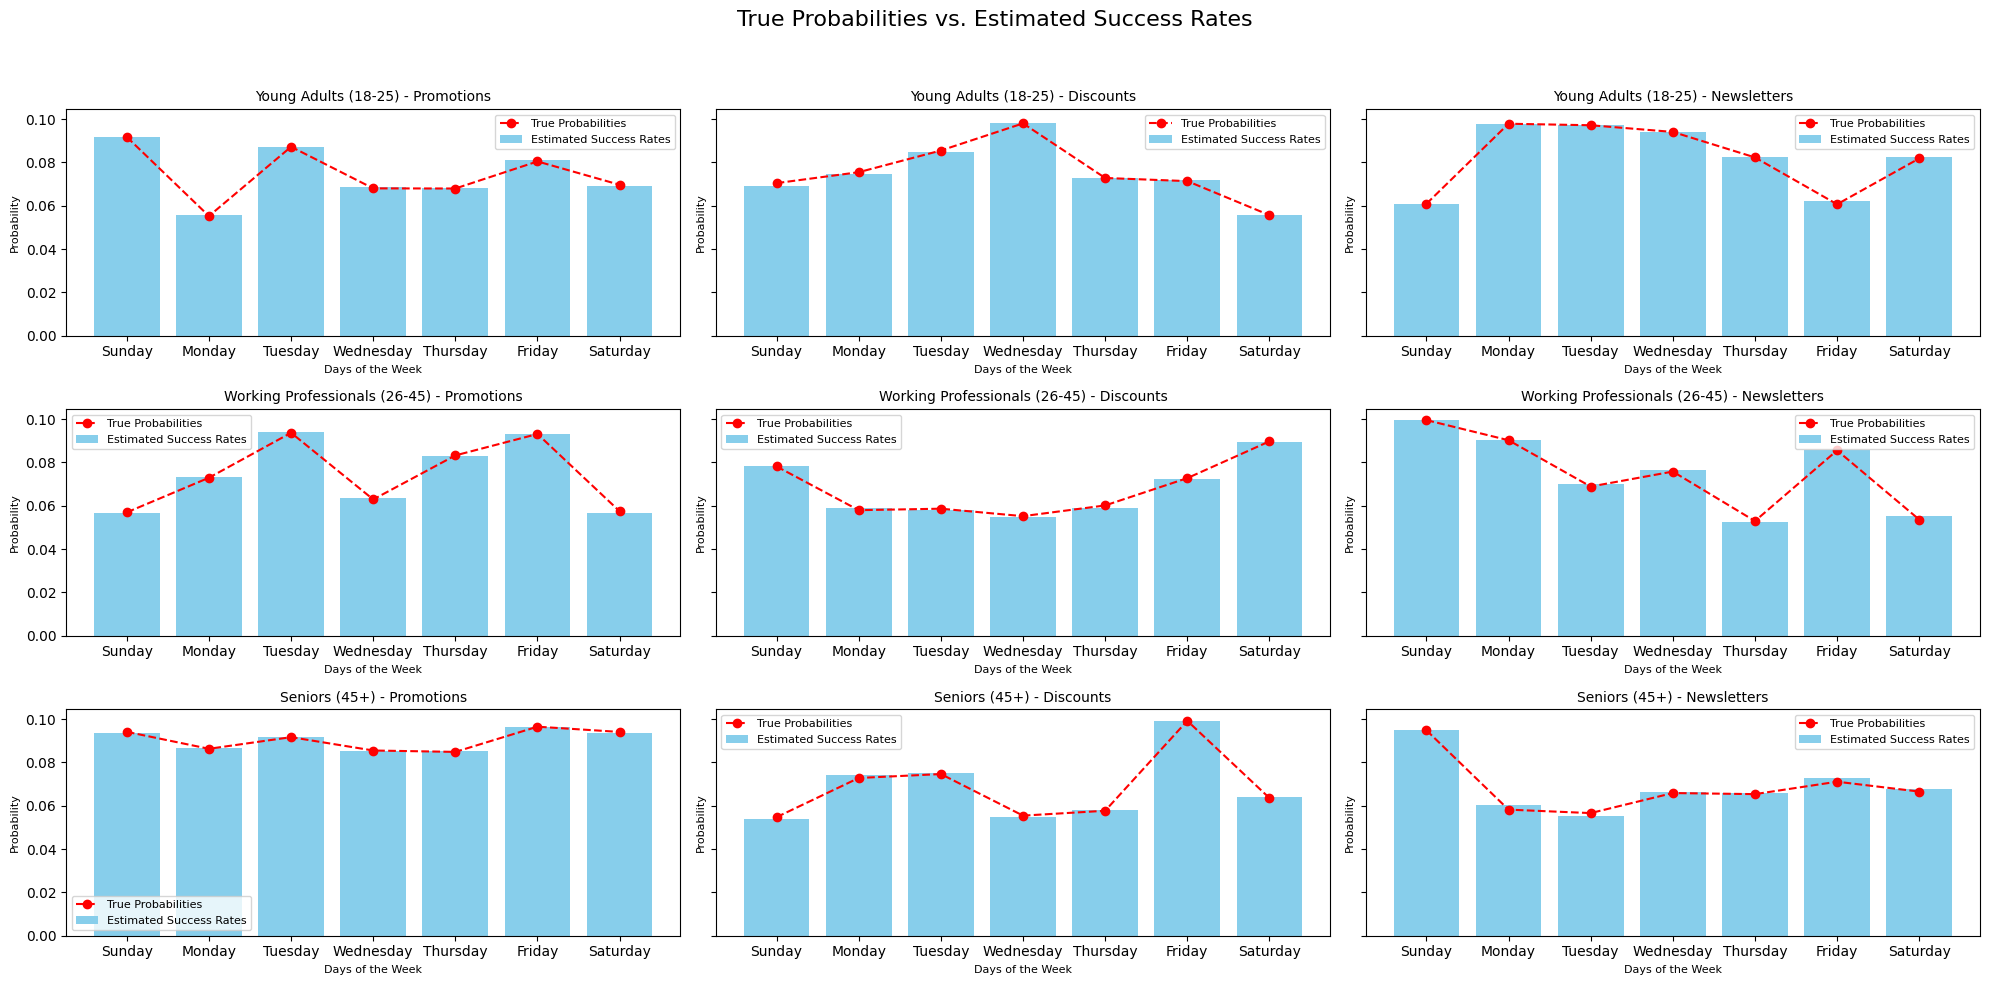

In [5]:
# Days of the week
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot results using subplots
fig, axes = plt.subplots(len(segmented_category_means), len(categories), figsize=(20, 10), sharey=True)
fig.suptitle("True Probabilities vs. Estimated Success Rates", fontsize=16)

# Iterate through segments and categories for visualization
for i, (segment, category_means) in enumerate(segmented_category_means.items()):
    for j, (category, true_means) in enumerate(category_means.items()):
        # Estimated success rates
        estimated_means = results[50000][segment][category]

        # Subplot index
        ax = axes[i, j] if len(segmented_category_means) > 1 else axes[j]

        # Bar and line plots
        ax.bar(days, estimated_means, color='skyblue', label='Estimated Success Rates')
        ax.plot(days, true_means, linestyle='--', marker='o', color='red', label='True Probabilities')

        # Title and labels
        ax.set_title(f"{segment} - {category}", fontsize=10)
        ax.set_xlabel("Days of the Week", fontsize=8)
        ax.set_ylabel("Probability", fontsize=8)
        ax.legend(fontsize=8)

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

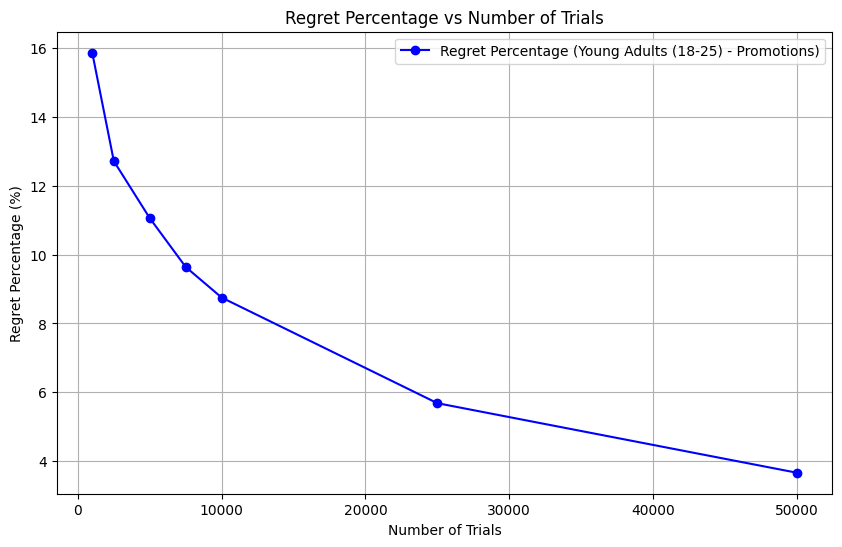

In [6]:
# Example visualization for a single segment and category
segment = 'Young Adults (18-25)'
category = 'Promotions'
trial_counts = []
regret_percentages = []

for num_trials in num_trials_values:
    trial_counts.append(num_trials)
    regret_percentages.append(metrics[num_trials][segment][category]['Regret Percentage'])

# Plot regret percentage vs trials
plt.figure(figsize=(10, 6))
plt.plot(num_trials_values, regret_percentages, marker='o', color='blue', label=f"Regret Percentage ({segment} - {category})")
plt.xlabel("Number of Trials")
plt.ylabel("Regret Percentage (%)")
plt.title("Regret Percentage vs Number of Trials")
plt.legend()
plt.grid()
plt.show()